In [1]:
using Flux
using JLD2
using Plots; gr()
using LCPSim
using LearningMPC

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9db0e137604e898c25f194d972715156bd46cb81-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9db0e137604e898c25f194d972715156bd46cb81-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/MeshCat.ji for module MeshCat.
INFO: Loading HttpServer methods...
INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/learning-mpc-2/packages/lib/v0.6/LearningMPC.ji for module LearningMPC.


In [2]:
@load "library.jld2" training
box_atlas_training = jldopen("../2018-08-26-comparing-mimic-and-bounds/library.jld2") do file
    file["training"]
    end;

In [3]:
gap(s) = abs(s.mip.objective_bound - s.mip.objective_value) / abs(s.mip.objective_value)

gap (generic function with 1 method)

In [32]:
sum(x -> x > 1.1, gap.(first.(box_atlas_training))) / length(box_atlas_training)

0.027718423551756886

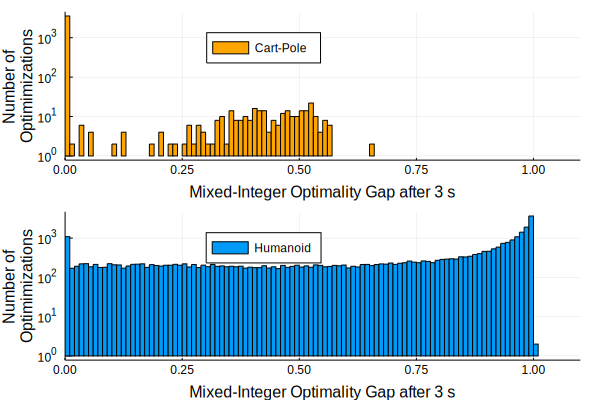

In [35]:
x = gap.(first.(box_atlas_training))
x = x[isfinite.(x)]
x = x[(i -> i < 1.1).(x)]
plt1 = histogram(x, nbins=100,
    xlabel = "Mixed-Integer Optimality Gap after 3 s",
    ylabel = "Number of \n Optimimizations",
    label = "Humanoid", 
    xlims = (0, 1.1),
    yscale=:log10,
#     title = "Humanoid",
)

plt2 = histogram(gap.(first.(training)), nbins=100,
    xlabel = "Mixed-Integer Optimality Gap after 3 s",
    ylabel = "Number of \n Optimimizations",
    label = "Cart-Pole",
    xlims = (0, 1.1),
    color=colorant"orange",
    yscale=:log10,
#     title = "Cart-Pole",

)

plt = plot(plt2, plt1, layout=(2, 1), legend=:top)
savefig(plt, "optimality_gap_histogram.pdf")
savefig(plt, "optimality_gap_histogram.png")
plt

In [36]:
length(training)

3862

In [37]:
length(box_atlas_training)

33696

In [38]:
box_atlas_mimic_training = jldopen("../2018-08-26-comparing-mimic-and-bounds/library-mimic.jld2") do file
    file["training"]
    end;

LoadError: [91mSystemError: opening file ../2018-08-26-comparing-mimic-and-bounds/library-mimic.jld2: No such file or directory[39m